# Example 13: Impact of strain limit on EQL

Show the impact of the strain limit on the EQL calculation.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import pystrata

%matplotlib inline

In [ ]:
# Increased figure sizes
plt.rcParams["figure.dpi"] = 120

## Create the inputs

In [ ]:
ts = pystrata.motion.TimeSeriesMotion.load_at2_file("data/NIS090.AT2", scale=3)
ts.pga

1.508247

In [ ]:
profile = pystrata.site.Profile(
    [
        pystrata.site.Layer(
            pystrata.site.DarendeliSoilType(
                18.0, plas_index=30, ocr=1, stress_mean=150
            ),
            15,
            150,
        ),
        pystrata.site.Layer(
            pystrata.site.DarendeliSoilType(20.0, plas_index=0, ocr=1, stress_mean=400),
            15,
            700,
        ),
        pystrata.site.Layer(pystrata.site.SoilType("Rock", 24.0, None, 0.01), 0, 1200),
    ]
).auto_discretize()

## Create the calculators

In [ ]:
calcs = [
    pystrata.propagation.EquivalentLinearCalculator(strain_limit=sl)
    for sl in [0.01, 0.02, 0.05, 0.10]
]

In [ ]:
freqs = np.logspace(-1, 2, num=500)

outputs = pystrata.output.OutputCollection(
    [
        pystrata.output.ResponseSpectrumOutput(
            # Frequency
            freqs,
            # Location of the output
            pystrata.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ),
        pystrata.output.ResponseSpectrumRatioOutput(
            # Frequency
            freqs,
            # Location in (denominator),
            pystrata.output.OutputLocation("outcrop", index=-1),
            # Location out (numerator)
            pystrata.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ),
        pystrata.output.MaxStrainProfile(),
    ]
)

## Perform calculation

In [ ]:
for c in calcs:
    try:
        c(ts, profile, profile.location("outcrop", index=-1))
    except RuntimeError as err:
        # Do something when the strain limit is exceeded?
        print(err)
        continue
    outputs(c, f"{c.strain_limit:0.2f}")

Strain limit exceeded.
Strain limit exceeded.


## Plot the results

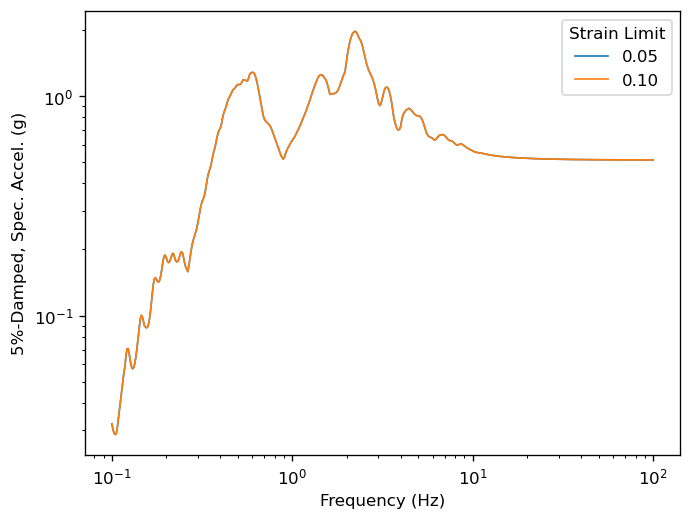

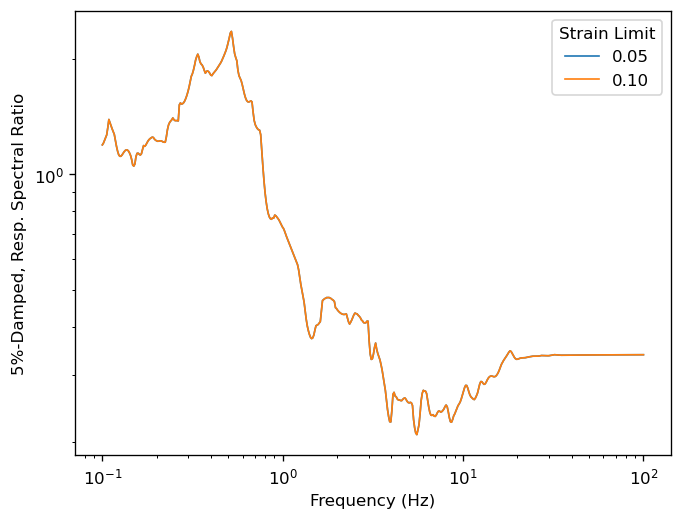

In [ ]:
for o in outputs[:2]:
    ax = o.plot(style="indiv")
    if ax.get_legend():
        ax.get_legend().set_title("Strain Limit")

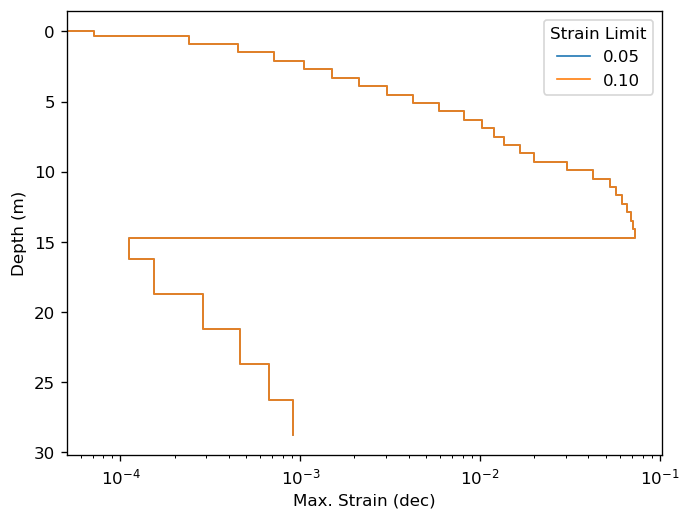

In [ ]:
for o in outputs[2:]:
    ax = o.plot(style="indiv")
    if ax.get_legend():
        ax.get_legend().set_title("Strain Limit")